In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import ndjson

# General results of the experiments

In [2]:
dm = ['dijkstra_fees', 'dijkstra_probabilities', 'pickhardt_pay_fees', 'pickhardt_pay_probability', 'pickhardt_pay_probability_retained']

In [3]:
set = 4
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)

df = df.loc[df['delivery_method'] == dm[set]]
s = df.groupby("success")[['residual_amount', 'amount']].sum()
print(dm[set])

print(s.applymap("{0:,}".format).style.to_latex())

table = df["success"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

counts = df["success"].value_counts()
percs = df["success"].value_counts(normalize=True)
print(pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).style.to_latex())

pickhardt_pay_probability_retained
\begin{tabular}{lll}
 & residual_amount & amount \\
success &  &  \\
delivery_failure & 192,396,404 & 481,915,588 \\
no_path_found & 2,216,658,058 & 2,216,658,058 \\
success & 0 & 2,312,102,524 \\
\end{tabular}

\begin{tabular}{lrr}
 & count & percentage \\
success & 5175 & 0.517500 \\
no_path_found & 3948 & 0.394800 \\
delivery_failure & 877 & 0.087700 \\
\end{tabular}



# Delivery Failure and Success

## No Path Found, Cut in the Network

In [4]:
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
df["failure_rate"] = df["delivery_failure"] / (df["delivery_failure"] + df["success"])
df["delta_failure_rate"] = df["delivery_failure_diff_to_ref"] / (df["delivery_failure"] + df["success"])
#data = df.groupby("payment_delivery_method")["delivery_failure_diff_to_ref"].agg([np.mean, np.min, np.max, np.std])

#df.to_csv("results_liquidity_seeds.csv",index=False)
df

,payment_delivery_method,seed,delivery_failure,no_path_found,success,delivery_failure_diff_to_ref,failure_rate,delta_failure_rate
0,dijkstra_fees,12340,4670,3639,1691,3797,0.734161,0.596919
1,dijkstra_probabilities,12340,2074,3639,4287,1201,0.326049,0.188807
2,pickhardt_pay_fees,12340,4255,3478,2267,3382,0.652407,0.518553
3,pickhardt_pay_probability,12340,1567,3478,4955,694,0.240264,0.106409
4,pickhardt_pay_probability_retained,12340,873,3941,5186,0,0.144083,0.000000
...,...,...,...,...,...,...,...,...
95,dijkstra_fees,12359,4722,3639,1639,3781,0.742336,0.594403
96,dijkstra_probabilities,12359,2217,3639,4144,1276,0.348530,0.200597
97,pickhardt_pay_fees,12359,4242,3478,2280,3301,0.650414,0.506133
98,pickhardt_pay_probability,12359,1664,3478,4858,723,0.255136,0.110856


In [5]:
df["path_found"] = df["delivery_failure"] + df["success"]
df = df[["payment_delivery_method", "no_path_found", "path_found"]]
#data = df.groupby("payment_delivery_method")[['no_path_found', 'path_found']]


# cross_tab_prop = pd.crosstab(index=df['payment_delivery_method'], columns=df['no_path_found', 'path_found'],normalize="index")
crosstab = df.groupby("payment_delivery_method").mean().round(0)
crosstab

,no_path_found,path_found
payment_delivery_method,,
dijkstra_fees,3639.0,6361.0
dijkstra_probabilities,3639.0,6361.0
pickhardt_pay_fees,3478.0,6522.0
pickhardt_pay_probability,3478.0,6522.0
pickhardt_pay_probability_retained,4029.0,5971.0


In [6]:
df = df.copy()
df['no_path_found_prop'] = df['no_path_found'] / (df['no_path_found'] + df['path_found'])
df.groupby("payment_delivery_method").mean().round(0)
df

,payment_delivery_method,no_path_found,path_found,no_path_found_prop
0,dijkstra_fees,3639,6361,0.3639
1,dijkstra_probabilities,3639,6361,0.3639
2,pickhardt_pay_fees,3478,6522,0.3478
3,pickhardt_pay_probability,3478,6522,0.3478
4,pickhardt_pay_probability_retained,3941,6059,0.3941
...,...,...,...,...
95,dijkstra_fees,3639,6361,0.3639
96,dijkstra_probabilities,3639,6361,0.3639
97,pickhardt_pay_fees,3478,6522,0.3478
98,pickhardt_pay_probability,3478,6522,0.3478


In [7]:
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
df["path_found"] = df["delivery_failure"] + df["success"]
npf = df.groupby("payment_delivery_method")["no_path_found"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
npf.to_csv("thesis/no_path_found.csv")
df['no_path_found_prop'] = df['no_path_found'] / (df['no_path_found'] + df['path_found'])
npfp = df.groupby("payment_delivery_method")["no_path_found_prop"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
npfp.to_csv("thesis/no_path_found_prop.csv")

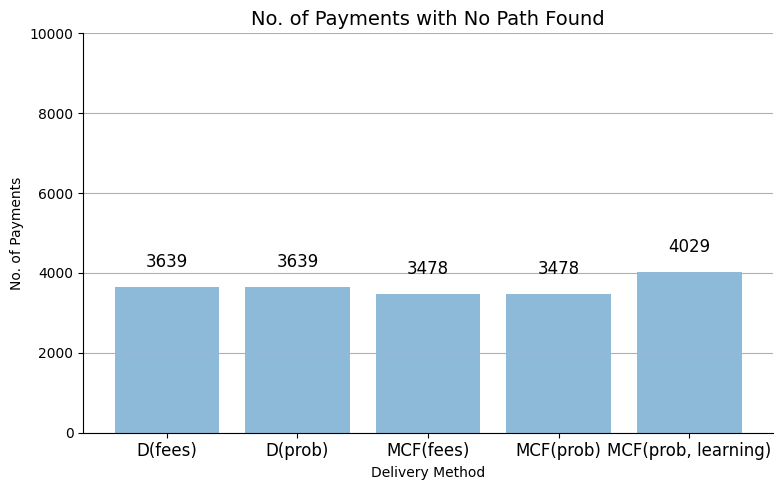

In [8]:
df = pd.read_csv("thesis/no_path_found.csv")## read the Dataframe
# df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
#       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 500,
        # s="{0:.2f}%".format(height * 100),
        s="{0:.0f}".format(height),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("No. of Payments with No Path Found",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Method")
plt.ylabel("No. of Payments")
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 10000, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/undeliverable_payments.png')
plt.show()

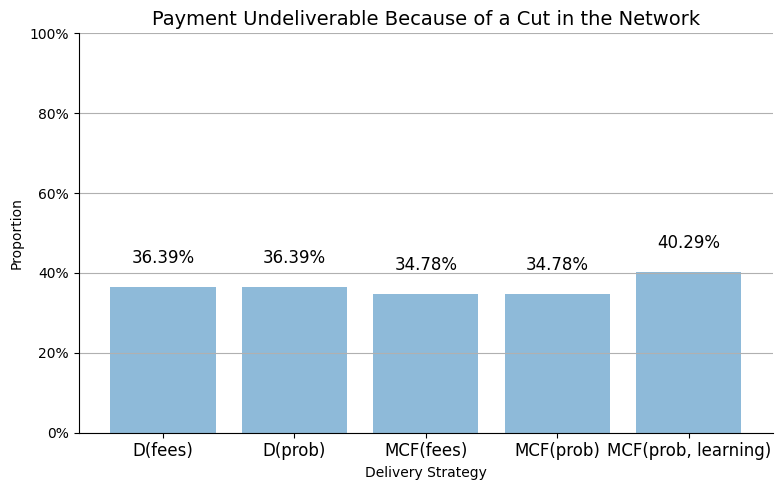

In [10]:
df = pd.read_csv("thesis/no_path_found_prop.csv")## read the Dataframe
# df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
#       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + .06,
        s="{0:.2f}%".format(height * 100),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12)
# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Payment Undeliverable Because of a Cut in the Network",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Proportion")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/undeliverable_payments_prop.png', dpi=300)
plt.show()

## Failure Rates by Payment Delivery Method

In [11]:
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)

df = df[['payment_delivery_method', 'failure_rate', 'delta_failure_rate']]
failure_rate = df.groupby("payment_delivery_method")["failure_rate"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
failure_rate.to_csv("thesis/failure_rate.csv")

delta_failure_rate = df.groupby("payment_delivery_method")["delta_failure_rate"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
delta_failure_rate.to_csv("thesis/failure_rate_delta.csv")
#print(failure_rate.to_latex())
failure_rate

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,20,0.768283,0.727401,0.890740,0.045317
dijkstra_probabilities,20,0.405801,0.319761,0.725200,0.110977
pickhardt_pay_fees,20,0.693921,0.644434,0.820147,0.050028
pickhardt_pay_probability,20,0.320362,0.234284,0.580803,0.098642
pickhardt_pay_probability_retained,20,0.207264,0.137197,0.434621,0.083249


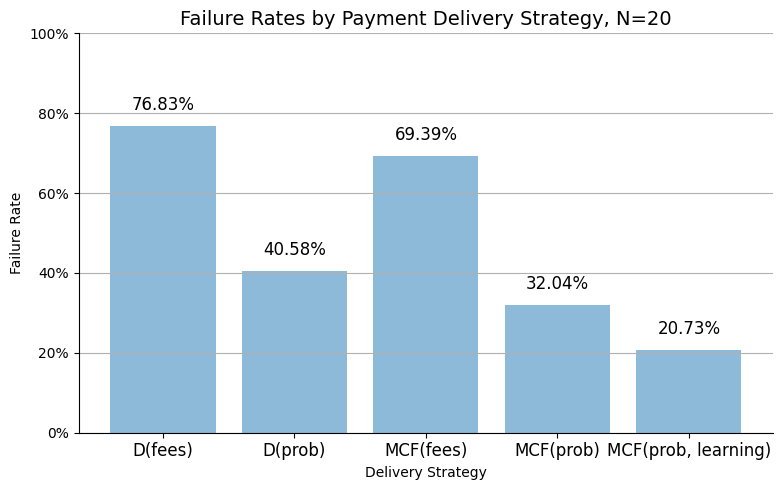

In [98]:
df = pd.read_csv("thesis/failure_rate.csv")## read the Dataframe
# df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
#       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + .04,
        s="{0:.2f}%".format(height * 100),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12)
# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
#plt.title("Failure Rates (and Standard Deviation) by Payment Delivery Method, N=18",fontsize=14)
plt.title("Failure Rates by Payment Delivery Strategy, N=20",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/failure_rates.png', dpi=300)
plt.show()

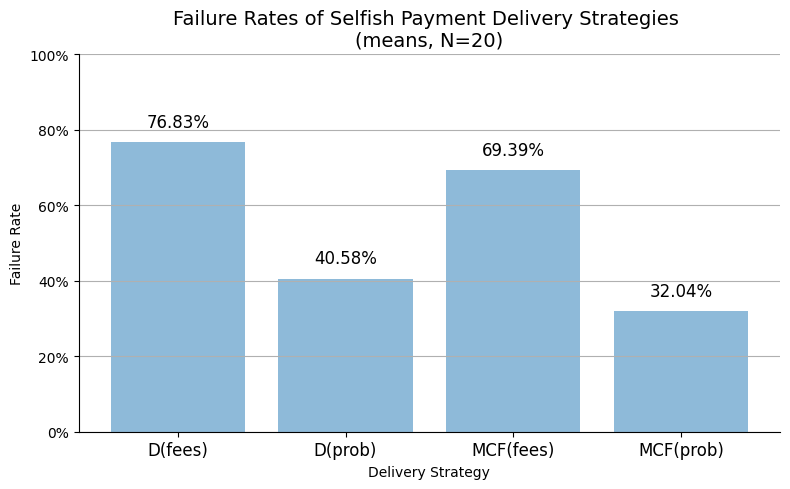

In [152]:
df = pd.read_csv("thesis/failure_rate.csv")## read the Dataframe
df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
#       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + .04,
        s="{0:.2f}%".format(height * 100),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12)
# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Failure Rates of Selfish Payment Delivery Strategies \n(means, N=20)",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/failure_rate_selfish.png', dpi=300)
plt.show()

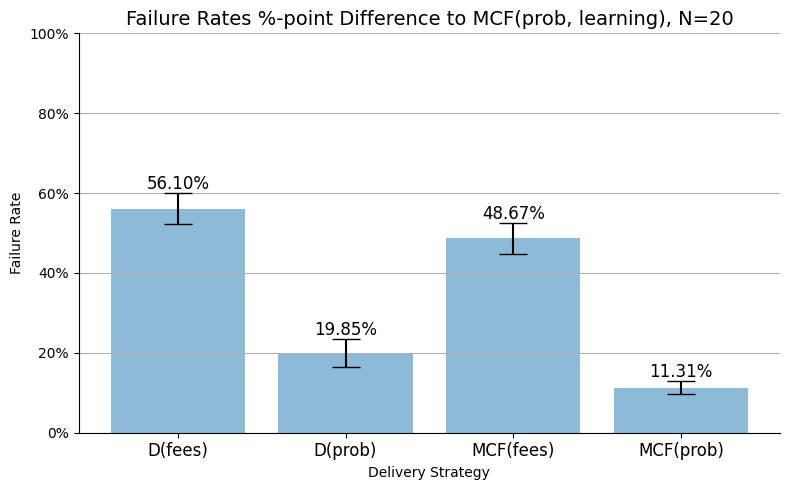

In [100]:
df = pd.read_csv("thesis/failure_rate_delta.csv")## read the Dataframe
df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + error[i] + .01,
        s="{0:.2f}%".format(height * 100),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12)
# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Failure Rates %-point Difference to MCF(prob, learning), N=20",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/failure_rate_delta.png', dpi=300)
plt.show()

In [15]:
df = pd.read_csv("thesis/failure_rate_delta.csv",index_col = "payment_delivery_method")
df = df.drop(df.index[-1])
#print(df.to_latex())
df

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,20,0.561019,0.456120,0.594783,0.038890
dijkstra_probabilities,20,0.198537,0.154645,0.290580,0.034975
pickhardt_pay_fees,20,0.486657,0.385526,0.533136,0.038980
pickhardt_pay_probability,20,0.113098,0.094443,0.150118,0.017390


In [16]:
df = pd.read_csv("thesis/failure_rate.csv",index_col = "payment_delivery_method")
df

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,20,0.768283,0.727401,0.890740,0.045317
dijkstra_probabilities,20,0.405801,0.319761,0.725200,0.110977
pickhardt_pay_fees,20,0.693921,0.644434,0.820147,0.050028
pickhardt_pay_probability,20,0.320362,0.234284,0.580803,0.098642
pickhardt_pay_probability_retained,20,0.207264,0.137197,0.434621,0.083249


# Delivery Failure and Success

## all payment delivery methods

In [17]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)

#df = df.iloc[0:40000]

df = df[['delivery_method', 'success']]
data = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

payment_success_prop = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'],
                             normalize="index")
payment_success_prop

success,delivery_failure,success
delivery_method,,
dijkstra_fees,0.735733,0.264267
dijkstra_probabilities,0.319761,0.680239
pickhardt_pay_fees,0.672186,0.327814
pickhardt_pay_probability,0.242717,0.757283
pickhardt_pay_probability_retained,0.144911,0.855089


In [18]:
payment_success = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'])
payment_success

success,delivery_failure,success
delivery_method,,
dijkstra_fees,4680,1681
dijkstra_probabilities,2034,4327
pickhardt_pay_fees,4384,2138
pickhardt_pay_probability,1583,4939
pickhardt_pay_probability_retained,877,5175


## selfish strategies

In [19]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)

df = df.iloc[0:40000]

df = df[['delivery_method', 'success']]
data = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

selfish_payment_success_prop = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'],
                             normalize="index")
selfish_payment_success_prop

success,delivery_failure,success
delivery_method,,
dijkstra_fees,0.735733,0.264267
dijkstra_probabilities,0.319761,0.680239
pickhardt_pay_fees,0.672186,0.327814
pickhardt_pay_probability,0.242717,0.757283


In [20]:
selfish_payment_success = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'])
selfish_payment_success

success,delivery_failure,success
delivery_method,,
dijkstra_fees,4680,1681
dijkstra_probabilities,2034,4327
pickhardt_pay_fees,4384,2138
pickhardt_pay_probability,1583,4939


# Experiment 6

In [21]:
df = pd.DataFrame({'amount in mio sats': [10148, 10148, 2631],
                   'flows': [33235, 7065, 4241]})
print(df)

   amount in mio sats  flows
0               10148  33235
1               10148   7065
2                2631   4241


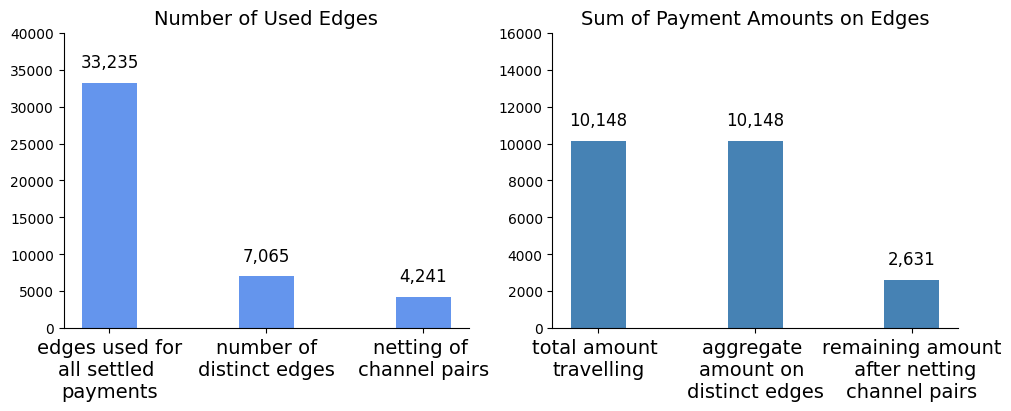

In [22]:
edge_labels = ['edges used for\nall settled \npayments', 'number of\ndistinct edges', 'netting of \nchannel pairs']
amount_labels = ['total amount \ntravelling', 'aggregate \namount on \ndistinct edges', 'remaining amount\n after netting\nchannel pairs']
amount = [10148, 10148, 2631]
flows = [33235, 7065, 4241]

x = np.arange(len(edge_labels))  # the label locations
width = 0.35  # the width of the bars

fig, (ax0, ax1) = plt.subplots(figsize=(10, 4), layout='constrained', nrows=1, ncols=2)

ax0.set_title('Number of Used Edges', fontsize=14)
l0 = ax0.bar(x, flows, width, label='Number of Used Edges', color="cornflowerblue")
ax0.set_xticks(x, edge_labels, fontsize=14)
ax0.bar_label(l0, padding=8, fontsize=12, labels=[f'{x:,.0f}' for x in l0.datavalues])
ax0.set_ylim([0,40000])

ax1.set_title('Sum of Payment Amounts on Edges', fontsize=14)
l1 = ax1.bar(x, amount, width, label='Amount in Mio Sats', color="steelblue")
ax1.set_xticks(x, amount_labels, fontsize=14)
ax1.bar_label(l1, padding=8, fontsize=12, labels=[f'{x:,.0f}' for x in l1.datavalues])
ax1.set_ylim([0,16000])


ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.savefig('thesis/img/flows_and_amounts_sent.png', dpi=300)
plt.show()

# Drain over Time

In [23]:
with open('data/all_results.ndjson') as f:
    dfpayments = ndjson.load(f)
df = pd.DataFrame(p)
method = 0
df = df.loc[(df["delivery_method"] == dm[method])]

i = 0
for i in range(0, 4):
    print(df.iloc[(i * 2500):((i+1) * 2500)]["residual_amount"].sum())


1029348140
1119515636
1133410628
1185903264


In [24]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df['ind'] = df.index
df = df[['ind','delivery_method', 'success']]
df = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

#df_dijkstra_fees.groupby("delivery_method")["success"].value_counts()
method = 0
bins = pd.cut(df['ind'], np.arange(method * 10000 + 0, method * 10000 + 10001, 2500))
#bins = pd.cut(df['ind'], [0, 2500, 5000, 7500, 10000])
# df.groupby(bins)['success'].agg(['count', 'sum'])
df.groupby(bins)['success'].value_counts(normalize=True)
#df.groupby(bins)['success'].value_counts()

ind            success         
(0, 2500]      delivery_failure    0.589433
               success             0.410567
(2500, 5000]   delivery_failure    0.729089
               success             0.270911
(5000, 7500]   delivery_failure    0.793321
               success             0.206679
(7500, 10000]  delivery_failure    0.828857
               success             0.171143
Name: success, dtype: float64

In [25]:
Dfee = [0.589433, 0.729089, 0.793321, 0.828857]

In [26]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df['ind'] = df.index
df = df[['ind','delivery_method', 'success']]
df = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

method = 1
bins = pd.cut(df['ind'], np.arange(method * 10000 + 0, method * 10000 + 10001, 2500))

# df.groupby(bins)['success'].agg(['count', 'sum'])
df.groupby(bins)['success'].value_counts(normalize=True)

ind             success         
(10000, 12500]  success             0.747931
                delivery_failure    0.252069
(12500, 15000]  success             0.689139
                delivery_failure    0.310861
(15000, 17500]  success             0.658475
                delivery_failure    0.341525
(17500, 20000]  success             0.626483
                delivery_failure    0.373517
Name: success, dtype: float64

In [27]:
Dprob = [0.252069, 0.310861, 0.341525, 0.373517]

In [28]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df['ind'] = df.index
df = df[['ind','delivery_method', 'success']]
df = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

method = 2
bins = pd.cut(df['ind'], np.arange(method * 10000 + 0, method * 10000 + 10001, 2500))
# df.groupby(bins)['success'].agg(['count', 'sum'])
df.groupby(bins)['success'].value_counts(normalize=True)

ind             success         
(20000, 22500]  success             0.525633
                delivery_failure    0.474367
(22500, 25000]  delivery_failure    0.691463
                success             0.308537
(25000, 27500]  delivery_failure    0.734481
                success             0.265519
(27500, 30000]  delivery_failure    0.786675
                success             0.213325
Name: success, dtype: float64

In [29]:
MCFfee = [ 0.474367, 0.691463, 0.734481 ,0.786675]

In [30]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df['ind'] = df.index
df = df[['ind','delivery_method', 'success']]
df = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

method = 3
bins = pd.cut(df['ind'], np.arange(method * 10000 + 0, method * 10000 + 10001, 2500))
# df.groupby(bins)['success'].agg(['count', 'sum'])
df.groupby(bins)['success'].value_counts(normalize=True)

ind             success         
(30000, 32500]  success             0.806671
                delivery_failure    0.193329
(32500, 35000]  success             0.756098
                delivery_failure    0.243902
(35000, 37500]  success             0.739398
                delivery_failure    0.260602
(37500, 40000]  success             0.727384
                delivery_failure    0.272616
Name: success, dtype: float64

In [31]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df['ind'] = df.index
df = df[['ind','delivery_method', 'success']]
df = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]
df.head()

#method = 3
#bins = pd.cut(df['ind'], np.arange(method * 10000 + 0, method * 10000 + 10001, 2500))
# df.groupby(bins)['success'].agg(['count', 'sum'])
#df.groupby(bins)['success'].value_counts(normalize=True)

,ind,delivery_method,success
1,1,dijkstra_fees,delivery_failure
2,2,dijkstra_fees,delivery_failure
5,5,dijkstra_fees,delivery_failure
6,6,dijkstra_fees,delivery_failure
8,8,dijkstra_fees,delivery_failure


In [32]:
MCFprob = [ 0.193329, 0.243902, 0.260602 ,0.272616]

In [33]:
with open('data/all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)
df['ind'] = df.index
df = df[['ind','delivery_method', 'success']]
df = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

method = 4
bins = pd.cut(df['ind'], np.arange(method * 10000 + 0, method * 10000 + 10001, 2500))
# df.groupby(bins)['success'].agg(['count', 'sum'])
df.groupby(bins)['success'].value_counts(normalize=True)
# df.groupby(bins)['success'].value_counts()

ind             success         
(40000, 42500]  success             0.843075
                delivery_failure    0.156925
(42500, 45000]  success             0.841280
                delivery_failure    0.158720
(45000, 47500]  success             0.859174
                delivery_failure    0.140826
(47500, 50000]  success             0.878231
                delivery_failure    0.121769
Name: success, dtype: float64

In [34]:
print(1327 + 1288 + 1269 + 1291)
print(247 + 243 + 208 + 179)

5175
877


In [35]:
MCFproblearn = [ 0.156925, 0.158720, 0.140826 ,0.121769]

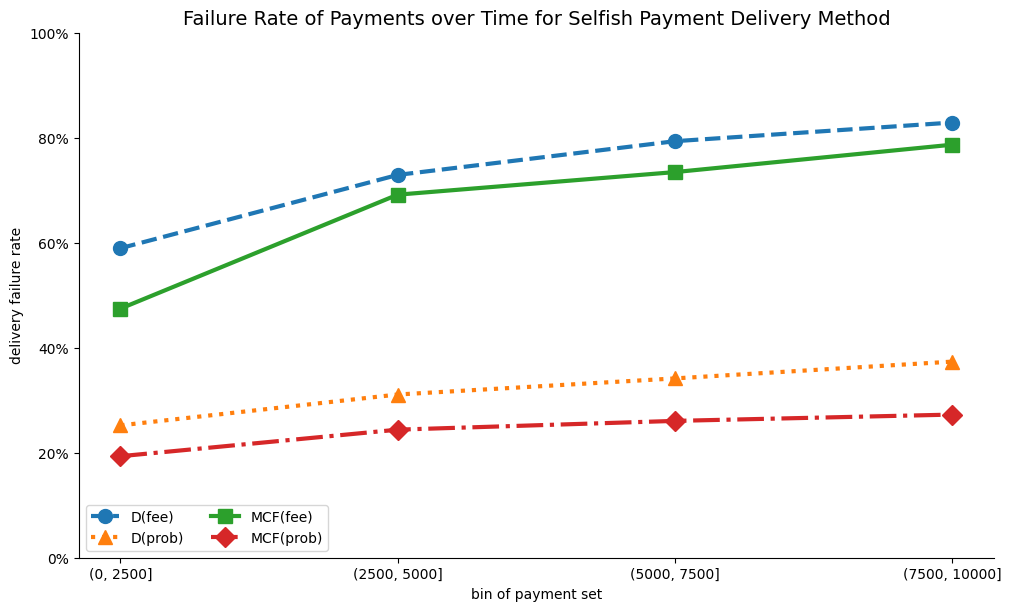

In [36]:
# create data
labels = ["(0, 2500]", "(2500, 5000]", "(5000, 7500]", "(7500, 10000]"]
x = [1,2,3,4]
y = [3,3,3,3]

#plt.plot(colormap='Set3',figsize=(10, 6))
plt.figure(figsize=(10,6), layout='constrained')
# plot lines
plt.plot(labels, Dfee, label = "D(fee)", linestyle="dashed",linewidth=3, marker='o', markersize=10)
plt.plot(labels, Dprob, label = "D(prob)", linestyle="dotted",linewidth=3, marker='^', markersize=10)
plt.plot(labels, MCFfee, label = "MCF(fee)", linestyle="solid",linewidth=3, marker='s', markersize=10)
plt.plot(labels, MCFprob, label = "MCF(prob)", linestyle="dashdot",linewidth=3, marker='D', markersize=10)
# plt.plot(labels, MCFproblearn, label = "MCF(prob, learn)")
#plt.plot(x, y, label = "line 2")
#plt.plot(x, np.sin(x), label = "curve 1")
#plt.plot(x, np.cos(x), label = "curve 2")
plt.title("Failure Rate of Payments over Time for Selfish Payment Delivery Method",fontsize=14)
plt.legend(loc="lower left", ncol=2)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.xlabel("bin of payment set")
plt.ylabel("delivery failure rate")
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('thesis/img/failure_rates_over_time_selfish_strategies.png')
plt.show()

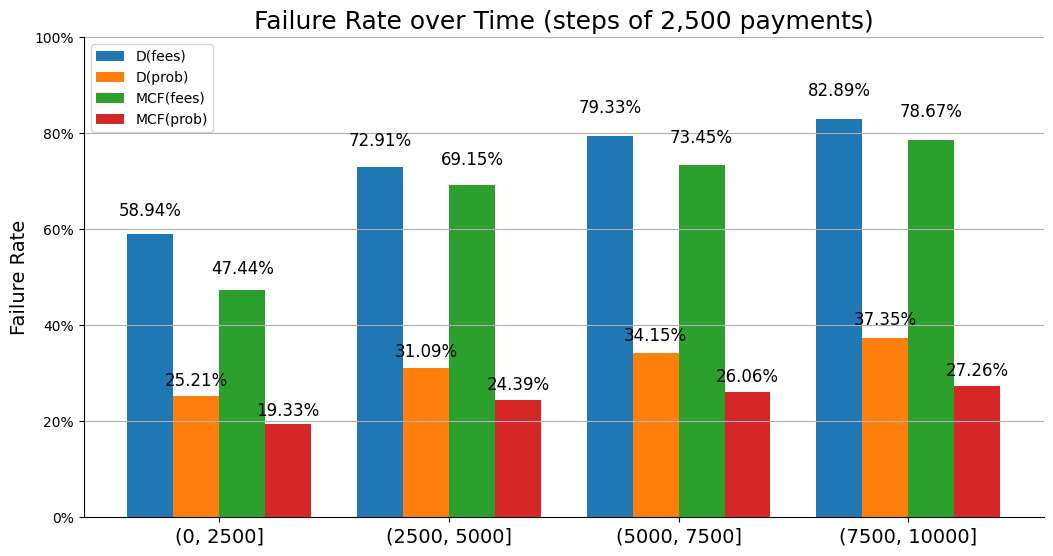

In [101]:
column_labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
labels = ["(0, 2500]", "(2500, 5000]", "(5000, 7500]", "(7500, 10000]"]
#strat1 = np.array(strat_time[0])
#strat2 = np.array(strat_time[1])
#strat3 = np.array(strat_time[2])
#strat4 = np.array(strat_time[3])
#strat5 = np.array(MCFproblearn)

fig = plt.figure(figsize=(12, 8))
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.2
ticks = np.arange(len(labels))
rects1 = ax.bar(ticks - 1.5 * width, Dfee, width, align="center", label=column_labels[0])
rects2 = ax.bar(ticks - 0.5 * width, Dprob, width, align="center", label=column_labels[1], ecolor='black')
rects3 = ax.bar(ticks + 0.5 * width, MCFfee, width, align="center", label=column_labels[2], ecolor='black')
rects4 = ax.bar(ticks + 1.5 * width, MCFprob, width, align="center", label=column_labels[3], ecolor='black')
#rects5 = ax.bar(ticks + 1.5 * width, strat5, width, label='300 nodes deleted', ecolor='black')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                "{0:.2f}%".format(height * 100),fontsize=12,ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)



ax.set_ylabel('Failure Rate',fontsize=14)

ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=14)
ax.yaxis.grid(True)

ax.legend(loc='upper left')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Failure Rate over Time (steps of 2,500 payments)",fontsize=18)
# plt.xlabel("payment delivery strategy",fontsize=14)

plt.savefig('thesis/img/failure_rate_over_time_bins_selfish.png', dpi=300)
plt.show()

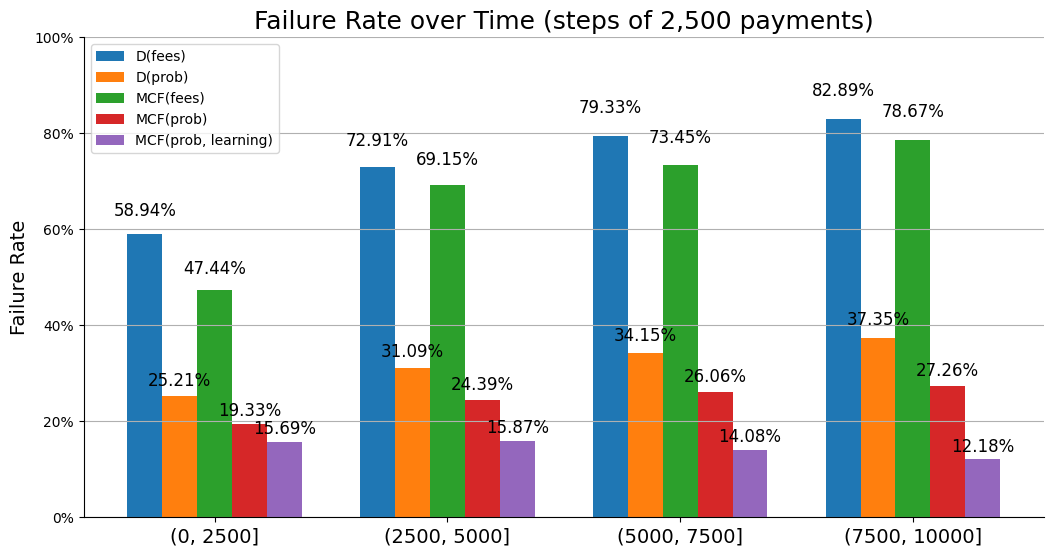

In [102]:
column_labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
labels = ["(0, 2500]", "(2500, 5000]", "(5000, 7500]", "(7500, 10000]"]
strat1 = np.array(strat_time[0])
strat2 = np.array(strat_time[1])
strat3 = np.array(strat_time[2])
strat4 = np.array(strat_time[3])
strat5 = np.array(strat_time[4])

fig = plt.figure(figsize=(12, 8))
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.15
ticks = np.arange(len(labels))
rects1 = ax.bar(ticks - 2 * width, Dfee, width, align="center", label=column_labels[0])
rects2 = ax.bar(ticks - 1 * width, Dprob, width, align="center", label=column_labels[1], ecolor='black')
rects3 = ax.bar(ticks , MCFfee, width, align="center", label=column_labels[2], ecolor='black')
rects4 = ax.bar(ticks + 1 * width, MCFprob, width, align="center", label=column_labels[3], ecolor='black')
rects5 = ax.bar(ticks + 2 * width, MCFproblearn, width, label=column_labels[4], ecolor='black')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                "{0:.2f}%".format(height * 100),fontsize=12,ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)



ax.set_ylabel('Failure Rate',fontsize=14)

ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=14)
ax.yaxis.grid(True)

ax.legend(loc='upper left')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Failure Rate over Time (steps of 2,500 payments)",fontsize=18)
# plt.xlabel("payment delivery strategy",fontsize=14)

plt.savefig('thesis/img/failure_rate_over_time_bins.png', dpi=300)
plt.show()

In [39]:
strategies = [Dfee, Dprob, MCFfee, MCFprob, MCFproblearn]
strat_time = []
for s in strategies:
    strat = []
    for i in range(0, 3):
        strat.append(s[i+1] - s[i])
    strat_time.append(strat)

strat_bin = []
for i in range(0, 3):
    strat_values = []
    for s in strategies:
        strat_values.append(s[i+1] - s[i])
    strat_bin.append(strat_values)
print(strat_bin[1])

[0.06423200000000007, 0.030664000000000025, 0.043018, 0.016699999999999993, -0.017893999999999993]


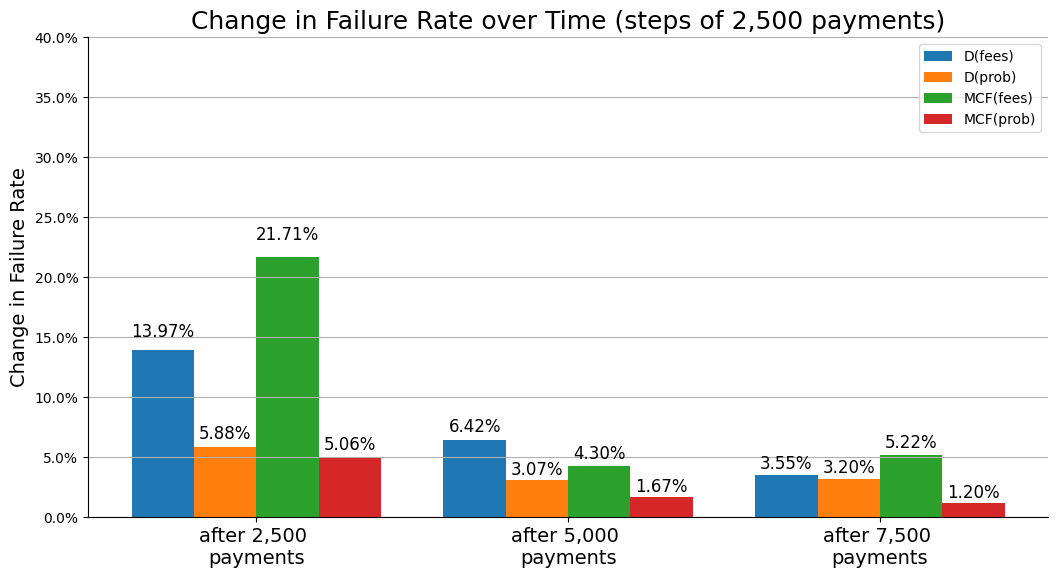

In [103]:
column_labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
labels = ["after 2,500 \npayments", "after 5,000 \npayments", "after 7,500 \npayments"]
strat1 = np.array(strat_time[0])
strat2 = np.array(strat_time[1])
strat3 = np.array(strat_time[2])
strat4 = np.array(strat_time[3])
strat5 = np.array(strat_time[4])

fig = plt.figure(figsize=(12, 8))
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.2
ticks = np.arange(len(labels))
rects1 = ax.bar(ticks - 1.5 * width, strat1, width, align="center", label=column_labels[0])
rects2 = ax.bar(ticks - 0.5 * width, strat2, width, align="center", label=column_labels[1], ecolor='black')
rects3 = ax.bar(ticks + 0.5 * width, strat3, width, align="center", label=column_labels[2], ecolor='black')
rects4 = ax.bar(ticks + 1.5 * width, strat4, width, align="center", label=column_labels[3], ecolor='black')
#rects5 = ax.bar(ticks + 1.5 * width, strat5, width, label='300 nodes deleted', ecolor='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                "{0:.2f}%".format(height * 100),fontsize=12,ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
#autolabel(rects5)


ax.set_ylabel('Change in Failure Rate',fontsize=14)

ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=14)
ax.yaxis.grid(True)

ax.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 0.4, ymin = -0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Change in Failure Rate over Time (steps of 2,500 payments)",fontsize=18)
# plt.xlabel("payment delivery strategy",fontsize=14)

plt.savefig('thesis/img/failure_rate_over_time_bins_selfish_delta.png', dpi=300)
plt.show()

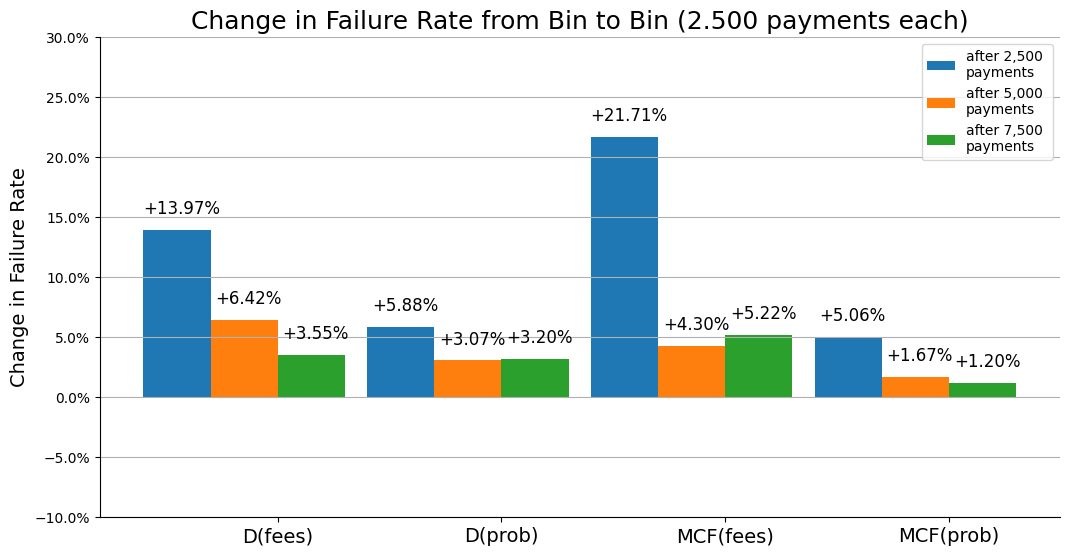

In [41]:
column_labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
time_labels = ["after 2,500 \npayments", "after 5,000 \npayments", "after 7,500 \npayments"]
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
selfish_labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]

fig = plt.figure(figsize=(12, 8))
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])


width = 0.3
ticks = np.arange(len(labels[0:4]))
rects1 = ax.bar(ticks - 1.5 * width, np.array(strat_bin[0][0:4]), width, align="center", label=time_labels[0])
rects2 = ax.bar(ticks - 0.5 * width, np.array(strat_bin[1][0:4]), width, align="center", label=time_labels[1], ecolor='black')
rects3 = ax.bar(ticks + 0.5 * width, np.array(strat_bin[2][0:4]), width, align="center", label=time_labels[2], ecolor='black')

# rects4 = ax.bar(ticks + 1.5 * width, strat4, width, align="center", label=column_labels[3], ecolor='black')
# rects5 = ax.bar(ticks + 1.5 * width, strat5, width, label='300 nodes deleted', ecolor='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if rect.get_height() >= 0:
            ax.text(rect.get_x() + rect.get_width()/2. + .02, height + 0.01,
                    "+{0:.2f}%".format(height * 100),fontsize=12,ha='center', va='bottom')
        else:
            ax.text(rect.get_x() + rect.get_width()/2. + .02, height - 0.025,
                    "{0:.2f}%".format(height * 100),fontsize=12,ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Change in Failure Rate',fontsize=14)

ax.set_xticks(ticks)
ax.set_xticklabels(labels[0:4],fontsize=14)
ax.yaxis.grid(True)

ax.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 0.3, ymin = -0.1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Change in Failure Rate from Bin to Bin (2.500 payments each)",fontsize=18)
# plt.xlabel("payment delivery strategy",fontsize=14)

plt.savefig('thesis/img/failure_rate_over_time_selfish_delta.png', dpi=300)
plt.show()

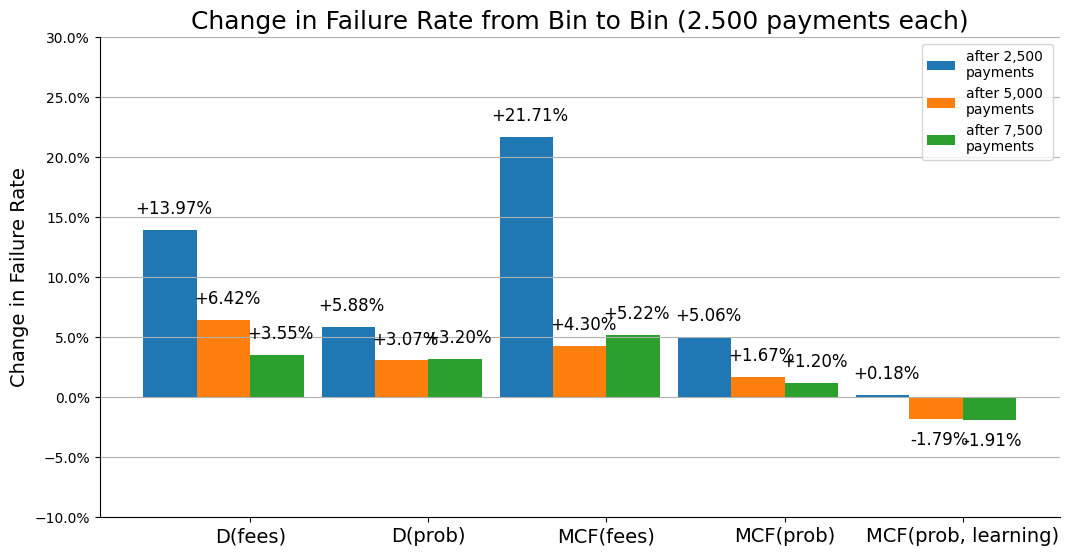

In [42]:
column_labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
time_labels = ["after 2,500 \npayments", "after 5,000 \npayments", "after 7,500 \npayments"]
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
selfish_labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]

fig = plt.figure(figsize=(12, 8))
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.3
ticks = np.arange(len(labels))
rects1 = ax.bar(ticks - 1.5 * width, np.array(strat_bin[0]), width, align="center", label=time_labels[0])
rects2 = ax.bar(ticks - 0.5 * width, np.array(strat_bin[1]), width, align="center", label=time_labels[1], ecolor='black')
rects3 = ax.bar(ticks + 0.5 * width, np.array(strat_bin[2]), width, align="center", label=time_labels[2], ecolor='black')
# rects4 = ax.bar(ticks + 1.5 * width, strat4, width, align="center", label=column_labels[3], ecolor='black')
# rects5 = ax.bar(ticks + 1.5 * width, strat5, width, label='300 nodes deleted', ecolor='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if rect.get_height() >= 0:
            ax.text(rect.get_x() + rect.get_width()/2. + .02, height + 0.01,
                    "+{0:.2f}%".format(height * 100),fontsize=12,ha='center', va='bottom')
        else:
            ax.text(rect.get_x() + rect.get_width()/2. + .02, height - 0.025,
                    "{0:.2f}%".format(height * 100),fontsize=12,ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

ax.set_ylabel('Change in Failure Rate',fontsize=14)

ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=14)
ax.yaxis.grid(True)

ax.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 0.3, ymin = -0.1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Change in Failure Rate from Bin to Bin (2.500 payments each)",fontsize=18)
# plt.xlabel("payment delivery strategy",fontsize=14)

plt.savefig('thesis/img/failure_rate_over_time.png', dpi=300)
plt.show()

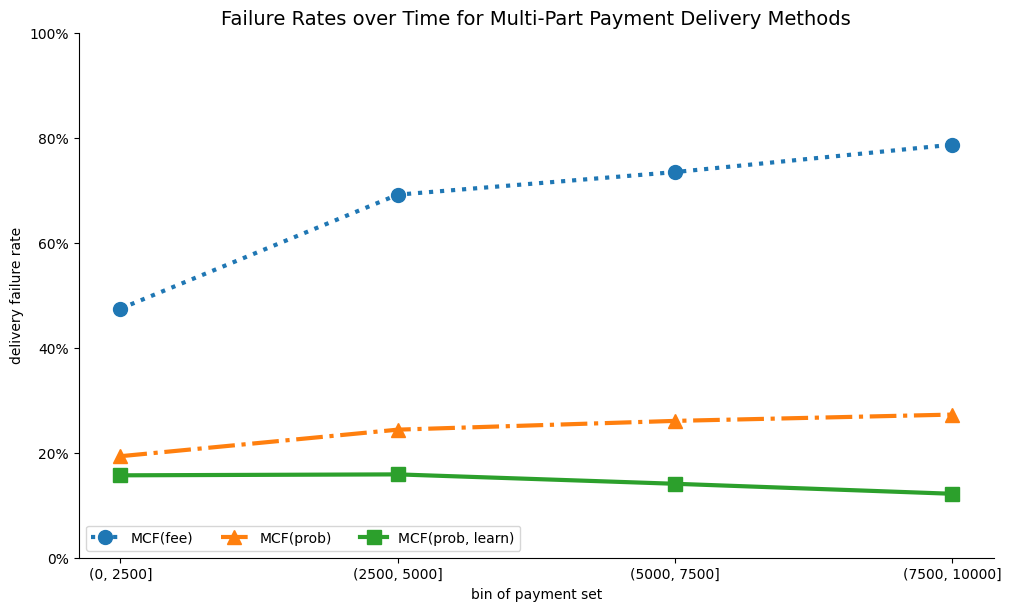

In [43]:
# create data
labels = ["(0, 2500]", "(2500, 5000]", "(5000, 7500]", "(7500, 10000]"]
x = [1,2,3,4]
y = [3,3,3,3]

#plt.plot(colormap='Set3',figsize=(10, 6))
plt.figure(figsize=(10,6), layout='constrained')
# plot lines
plt.plot(labels, MCFfee, label = "MCF(fee)", linestyle="dotted",linewidth=3, marker='o', markersize=10)
plt.plot(labels, MCFprob, label = "MCF(prob)", linestyle="dashdot",linewidth=3, marker='^', markersize=10)
plt.plot(labels, MCFproblearn, label = "MCF(prob, learn)", linestyle="solid",linewidth=3, marker='s', markersize=10)
# plt.plot(labels, MCFproblearn, label = "MCF(prob, learn)")
#plt.plot(x, y, label = "line 2")
#plt.plot(x, np.sin(x), label = "curve 1")
#plt.plot(x, np.cos(x), label = "curve 2")
plt.title("Failure Rates over Time for Multi-Part Payment Delivery Methods",fontsize=14)
plt.legend(loc="lower left", ncol=3)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.xlabel("bin of payment set")
plt.ylabel("delivery failure rate")
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('thesis/img/failure_rates_over_time_mpp_strategies.png', dpi=300)
plt.show()

## Drain over time (smart panda)

In [44]:
with open('data/1337_12340_all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)

#df = df[['ind','delivery_method', 'success']]
df = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]



first_quarter = df.groupby('delivery_method').head(5000).reset_index(drop=True)
first_quarter.groupby(['delivery_method'])['success'].value_counts(normalize=True)
# df.groupby(bins)['success'].value_counts(normalize=True)
#first_quarter

delivery_method                     success         
dijkstra_fees                       delivery_failure    0.7072
                                    success             0.2928
dijkstra_probabilities              success             0.6894
                                    delivery_failure    0.3106
pickhardt_pay_fees                  delivery_failure    0.6218
                                    success             0.3782
pickhardt_pay_probability           success             0.7668
                                    delivery_failure    0.2332
pickhardt_pay_probability_retained  success             0.8498
                                    delivery_failure    0.1502
Name: success, dtype: float64

# statistics re seeds

In [105]:
with open('data/1337_12359_all_results.ndjson') as f:
    p = ndjson.load(f)
data = pd.DataFrame(p)
data.groupby("delivery_method")["success"].value_counts()

delivery_method                     success         
dijkstra_fees                       delivery_failure    4722
                                    no_path_found       3639
                                    success             1639
dijkstra_probabilities              success             4144
                                    no_path_found       3639
                                    delivery_failure    2217
pickhardt_pay_fees                  delivery_failure    4242
                                    no_path_found       3478
                                    success             2280
pickhardt_pay_probability           success             4858
                                    no_path_found       3478
                                    delivery_failure    1664
pickhardt_pay_probability_retained  success             5094
                                    no_path_found       3965
                                    delivery_failure     941
Name: success, dtype: int64

In [106]:
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
df["reliability_rate"] = df["delivery_failure"] / (df["delivery_failure"] + df["success"])
#df["diff_to_learning"] = df["delivery_failure"] / (df["delivery_failure"] + df["success"])
df.to_csv("reliability_rate.csv")
df

,payment_delivery_method,seed,delivery_failure,no_path_found,success,delivery_failure_diff_to_ref,failure_rate,delta_failure_rate,reliability_rate
0,dijkstra_fees,12340,4670,3639,1691,3797,0.734161,0.590078,0.734161
1,dijkstra_probabilities,12340,2074,3639,4287,1201,0.326049,0.181966,0.326049
2,pickhardt_pay_fees,12340,4255,3478,2267,3382,0.652407,0.508324,0.652407
3,pickhardt_pay_probability,12340,1567,3478,4955,694,0.240264,0.096181,0.240264
4,pickhardt_pay_probability_retained,12340,873,3941,5186,0,0.144083,0.000000,0.144083
...,...,...,...,...,...,...,...,...,...
95,dijkstra_fees,12359,4722,3639,1639,3781,0.742336,0.586412,0.742336
96,dijkstra_probabilities,12359,2217,3639,4144,1276,0.348530,0.192606,0.348530
97,pickhardt_pay_fees,12359,4242,3478,2280,3301,0.650414,0.494490,0.650414
98,pickhardt_pay_probability,12359,1664,3478,4858,723,0.255136,0.099213,0.255136


In [107]:
data = df.groupby("payment_delivery_method")["delivery_failure"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
#data = df.groupby("payment_delivery_method")["reliability_rate"].agg([np.mean, np.std])
# data.to_csv("reliability_rate.csv")
data

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,20,4887.05,4627,5666,288.261116
dijkstra_probabilities,20,2581.30,2034,4613,705.924336
pickhardt_pay_fees,20,4525.75,4203,5349,326.280453
pickhardt_pay_probability,20,2089.40,1528,3788,643.345238
pickhardt_pay_probability_retained,20,1228.85,831,2453,459.731418


In [108]:
data = df.groupby("payment_delivery_method")["reliability_rate"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
#data = df.groupby("payment_delivery_method")["reliability_rate"].agg([np.mean, np.std])
# data.to_csv("reliability_rate.csv")
data
#data.style.to_latex()

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,20,0.768283,0.727401,0.890740,0.045317
dijkstra_probabilities,20,0.405801,0.319761,0.725200,0.110977
pickhardt_pay_fees,20,0.693921,0.644434,0.820147,0.050028
pickhardt_pay_probability,20,0.320362,0.234284,0.580803,0.098642
pickhardt_pay_probability_retained,20,0.207264,0.137197,0.434621,0.083249


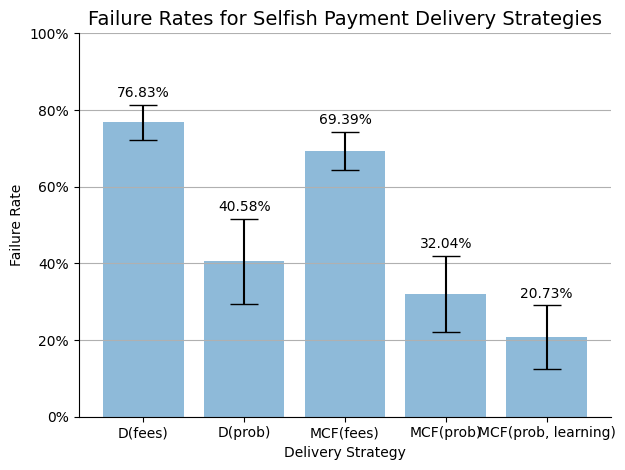

In [109]:
df = pd.read_csv("reliability_rate.csv")## read the Dataframe

# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
x_pos = np.arange(len(labels))
means = data['mean']
error = data['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots()
bars = ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + error[i] + .02,
        s="{0:.2f}%".format(height * 100),
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Failure Rates for Selfish Payment Delivery Strategies",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('failure_rates_error_bars.png', dpi=300)
plt.show()

In [110]:
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
df["reliability_rate"] = df["delivery_failure"] / (df["delivery_failure"] + df["success"])
df["delta_reliability_rate"] = df["delivery_failure_diff_to_ref"] / (df["delivery_failure"] + df["success"])
# data = df.groupby("payment_delivery_method")["reliability_rate"].agg([np.mean, np.min, np.max, np.std])
data = df.groupby("payment_delivery_method")["delta_reliability_rate"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
# data = df.groupby("payment_delivery_method")["delivery_failure_ddiff_to_ref_(MCFproblearn)"].agg([np.mean, np.std])
# data = df.groupby("payment_delivery_method")["reliability_rate"].agg([np.mean, np.std])
data.to_csv("difference_to_ref.csv")
data

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,20,0.575098,0.505109,0.601635,0.028440
dijkstra_probabilities,20,0.212616,0.174501,0.339569,0.044716
pickhardt_pay_fees,20,0.505504,0.444036,0.545385,0.027485
pickhardt_pay_probability,20,0.131946,0.104262,0.204692,0.029179
pickhardt_pay_probability_retained,0,0.000000,0.000000,0.000000,0.000000


In [111]:
df = pd.read_csv("difference_to_ref.csv")## read the Dataframe
df = df.drop(df.index[-1])
df

,payment_delivery_method,count_nonzero,mean,amin,amax,std
0,dijkstra_fees,20,0.575098,0.505109,0.601635,0.028440
1,dijkstra_probabilities,20,0.212616,0.174501,0.339569,0.044716
2,pickhardt_pay_fees,20,0.505504,0.444036,0.545385,0.027485
3,pickhardt_pay_probability,20,0.131946,0.104262,0.204692,0.029179


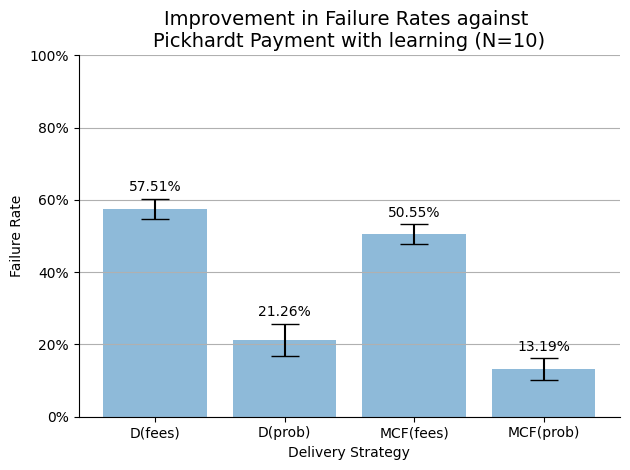

In [112]:
df = pd.read_csv("difference_to_ref.csv")## read the Dataframe
df = df.drop(df.index[-1])
df

# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots()
bars = ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + error[i] + .02,
        s="{0:.2f}%".format(height * 100),
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Improvement in Failure Rates against \nPickhardt Payment with learning (N=10)",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('improvement_by_pp_learning.png', dpi=300)
plt.show()

In [113]:
# https://www.jmp.com/de_at/statistics-knowledge-portal/t-test/two-sample-t-test.html

# reliability_rate
pp_mean = 0.354615
pp_learn_mean = 0.236325

# stdevs
pp_std = 0.126137
pp_learn_std = 0.107563

difference_of_means = pp_mean - pp_learn_mean
print(difference_of_means)

pooled_variance = (10* np.square(pp_std) + 10*np.square(pp_learn_std)) / (10+10-2)
pooled_std = np.sqrt(pooled_variance)
print(pooled_std)

t = difference_of_means / (pooled_std * np.square(1/10 + 1/10))
print(t)

0.11829
0.12355912156174918
23.933886568804244


In [114]:
pooled_std = np.square((np.square(pp_std) + np.square(pp_learn_std))/2)
t = difference_of_means / (pooled_std * np.sqrt(2/10))
print(t)

1401.0342972147284


## absolute values

In [115]:
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
df["reliability_rate"] = df["delivery_failure"] / (df["delivery_failure"] + df["success"])
df["delta_reliability_rate"] = df["delivery_failure_diff_to_ref"] / (df["delivery_failure"] + df["success"])
# data = df.groupby("payment_delivery_method")["reliability_rate"].agg([np.mean, np.min, np.max, np.std])
data = df.groupby("payment_delivery_method")["delivery_failure_diff_to_ref"].agg([np.mean, np.min, np.max, np.std])
# data = df.groupby("payment_delivery_method")["reliability_rate"].agg([np.mean, np.std])
#data.to_csv("delivery_failure_diff_to_ref.csv")
data

,mean,amin,amax,std
payment_delivery_method,,,,
dijkstra_fees,3658.20,3213,3827,180.909282
dijkstra_probabilities,1352.45,1110,2160,284.438408
pickhardt_pay_fees,3296.90,2896,3557,179.257797
pickhardt_pay_probability,860.55,680,1335,190.302937
pickhardt_pay_probability_retained,0.00,0,0,0.000000


In [116]:
df = pd.read_csv("delivery_failure_ddiff_to_ref.csv")
df = df.drop(df.index[-1])
df

,payment_delivery_method,mean,amin,amax,std
0,dijkstra_fees,3648.941176,3213,3827,194.370609
1,dijkstra_probabilities,1362.000000,1110,2160,308.216036
2,pickhardt_pay_fees,3276.117647,2896,3557,184.055658
3,pickhardt_pay_probability,867.000000,680,1335,203.647981


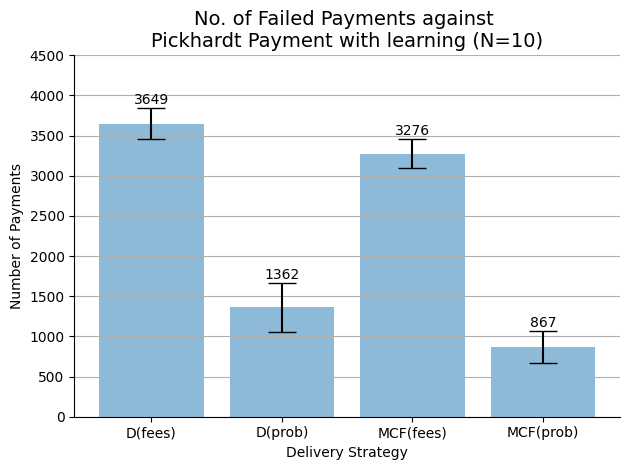

In [119]:


# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots()
bars = ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + error[i] + 50,
        # s="{0:.2f}%".format(height * 100),
        s="{0:.0f}".format(height),
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("No. of Failed Payments against \nPickhardt Payment with learning (N=10)",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Number of Payments")
# plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 4500, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('improvement_by_pp_learning.png', dpi=300)
plt.show()

In [120]:
method = ["dijkstra_fees", "dijkstra_probabilities", "pickhardt_pay_fees", "pickhardt_pay_probability", "pickhardt_pay_probability_retained"]
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
m = 1
df = df.loc[df['payment_delivery_method'] == method[m]][["delivery_failure"]]
df

,delivery_failure
1,2074
6,3064
11,2668
16,2359
21,2736
26,2034
31,2194
36,2064
41,4613
46,4237


In [121]:
method = ["dijkstra_fees", "dijkstra_probabilities", "pickhardt_pay_fees", "pickhardt_pay_probability", "pickhardt_pay_probability_retained"]
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
# paired sample -> the difference has mean 0
"""
for i in range(len(df['mean'])):
    # difference = df['mean'][i]
    difference = df.loc[df['payment_delivery_method'] == method[i]][["seed"]]
    stdev = df['mean'][i]
    print(difference, i)
    # the t-value is easily computed with numpy
    t = difference/(difference.std(ddof=1)/np.sqrt(len(difference)))
"""
i = 0
difference = df.loc[df['payment_delivery_method'] == method[i]][["seed"]]
t = (np.mean(difference))/(difference.std(ddof=1)/np.sqrt(len(difference)))
# unfortunately, numpy does not have a build in CDF
# here is a ridiculous work-around integrating by sampling
s = np.random.standard_t(len(difference), size=1)
p = np.sum(s<t) / float(len(s))
# using a two-sided test
print("There is a {} % probability that the paired samples stem from distributions with the same means.".format(2 * min(p, 1 - p) * 100))



There is a 0.0 % probability that the paired samples stem from distributions with the same means.


/Users/sebulino/PycharmProjects/Thesis/venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [122]:
from scipy import stats as st
method = ["dijkstra_fees", "dijkstra_probabilities", "pickhardt_pay_fees", "pickhardt_pay_probability", "pickhardt_pay_probability_retained"]
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)
df.head(15)


,payment_delivery_method,seed,delivery_failure,no_path_found,success,delivery_failure_diff_to_ref,failure_rate,delta_failure_rate
0,dijkstra_fees,12340,4670,3639,1691,3797,0.734161,0.590078
1,dijkstra_probabilities,12340,2074,3639,4287,1201,0.326049,0.181966
2,pickhardt_pay_fees,12340,4255,3478,2267,3382,0.652407,0.508324
3,pickhardt_pay_probability,12340,1567,3478,4955,694,0.240264,0.096181
4,pickhardt_pay_probability_retained,12340,873,3941,5186,0,0.144083,0.000000
5,dijkstra_fees,12341,5163,3639,1198,3308,0.811665,0.500632
6,dijkstra_probabilities,12341,3064,3639,3297,1209,0.481685,0.170652
7,pickhardt_pay_fees,12341,4914,3478,1608,3059,0.753450,0.442417
8,pickhardt_pay_probability,12341,2800,3478,3722,945,0.429316,0.118283
9,pickhardt_pay_probability_retained,12341,1855,4036,4109,0,0.311033,0.000000


In [123]:
# paired sample -> the difference has mean 0
"""
for i in range(len(df['mean'])):
    # difference = df['mean'][i]
    difference = df.loc[df['payment_delivery_method'] == method[i]][["delivery_failure"]]
    stdev = df['mean'][i]
    print(difference, i)
    # the t-value is easily computed with numpy
    t = difference/(difference.std(ddof=1)/np.sqrt(len(difference)))
"""
i = 0
print(method[i])
difference = df.loc[df['payment_delivery_method'] == method[i]][["delta_failure_rate"]]
print(df['delta_failure_rate'])
a =  difference.to_numpy()
#print(a)
#print(st.ttest_1samp(a=a, popmean=0))

dijkstra_fees
0     0.590078
1     0.181966
2     0.508324
3     0.096181
4     0.000000
        ...   
95    0.586412
96    0.192606
97    0.494490
98    0.099213
99    0.000000
Name: delta_failure_rate, Length: 100, dtype: float64


In [124]:
t_stat, p_value = st.ttest_1samp(a, popmean=0)
alpha = .001
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if p_value <= alpha:
    print("Hypothesis rejected, probability is {0:.4%}".format(float(p_value)))

T-statistic value:  [64.51371374]
P-Value:  [1.0086135e-23]
Hypothesis rejected, probability is 0.0000%


In [125]:
differences = np.array(difference)
t = (np.mean(differences)-0)/(differences.std(ddof=19)/np.sqrt(len(differences)))
t

14.800460982228635

## Calculate the T-test for the mean of ONE group of scores.

This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [126]:
from scipy import stats as st
method = ["dijkstra_fees", "dijkstra_probabilities", "pickhardt_pay_fees", "pickhardt_pay_probability", "pickhardt_pay_probability_retained"]
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)

i = 3
print(method[i])
# difference = df.loc[df['payment_delivery_method'] == method[i]][["failure_rate"]]
difference = df.loc[df['payment_delivery_method'] == method[i]][["delta_failure_rate"]]
# print(len(difference))
a =  difference.to_numpy()
# print(a)
print(st.ttest_1samp(a=a, popmean=0))

pickhardt_pay_probability
TtestResult(statistic=array([29.08572353]), pvalue=array([3.21970419e-17]), df=array([19]))


In [127]:
t_stat, p_value = st.ttest_1samp(a, popmean=0,alternative='two-sided')
alpha = .001
print(method[i])
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value)
if p_value <= alpha:
    print("Hypothesis rejected, probability is {0:.4%}".format(float(p_value)))

pickhardt_pay_probability
T-statistic value:  [29.08572353]
P-Value:  [3.21970419e-17]
Hypothesis rejected, probability is 0.0000%


# statistics re different payment sets

In [128]:
with open('data/1341_12345_pickhardtpay_prob.ndjson') as f:
    p = ndjson.load(f)
data = pd.DataFrame(p)
data.groupby("delivery_method")["success"].value_counts()

delivery_method            success         
pickhardt_pay_probability  success             4942
                           no_path_found       3444
                           delivery_failure    1614
Name: success, dtype: int64

In [129]:
df = pd.read_csv('comparing_payment_sets.csv')
df = pd.DataFrame(df)
df["failure_rate"] = df["delivery_failure"] / (df["delivery_failure"] + df["success"])


In [130]:
df.groupby("payment_delivery_method")["failure_rate"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,5,0.729426,0.720883,0.738695,0.007525
pickhardt_pay_probability,5,0.245333,0.241590,0.249733,0.003246


## confidence intervals

### comparing payment sets

In [131]:
from scipy import stats as st
method = ["dijkstra_fees", "pickhardt_pay_probability"]
df = pd.read_csv('comparing_payment_sets.csv')
df = pd.DataFrame(df)

i = 0
for i in range(0,2):
    print(method[i])
    test_value = df.loc[df['payment_delivery_method'] == method[i]][["failure_rate"]]
    a =  test_value.to_numpy()
    #print(st.t.interval(confidence=0.99, df=len(a)-1, loc=np.mean(a), scale=st.sem(a)))
    mean = df.loc[df['payment_delivery_method'] == method[i]][["failure_rate"]].mean()
    CI = st.t.interval(confidence=0.99, df=len(a)-1, loc=np.mean(a), scale=st.sem(a))
    print("mean: {:.4f}, interval: [{:.4f}, {:.4f}] ".format(float(mean), float(CI[0]), float(CI[1])))

dijkstra_fees
mean: 0.7294, interval: [0.7139, 0.7449] 
pickhardt_pay_probability
mean: 0.2453, interval: [0.2386, 0.2520] 


### comparing liquidity balances


In [132]:
from scipy import stats as st
method = ["dijkstra_fees", "dijkstra_probabilities", "pickhardt_pay_fees", "pickhardt_pay_probability", "pickhardt_pay_probability_retained"]
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)

i = 1
for i in range(0,5):
    print(method[i])
    test_value = df.loc[df['payment_delivery_method'] == method[i]][["failure_rate"]]
    a =  test_value.to_numpy()
    mean = df.loc[df['payment_delivery_method'] == method[i]][["failure_rate"]].mean()
    CI = st.t.interval(confidence=0.99, df=len(a)-1, loc=np.mean(a), scale=st.sem(a))
    print("mean: {:.4f}, interval: [{:.4f}, {:.4f}] ".format(float(mean), float(CI[0]), float(CI[1])))

dijkstra_fees
mean: 0.7683, interval: [0.7393, 0.7973] 
dijkstra_probabilities
mean: 0.4058, interval: [0.3348, 0.4768] 
pickhardt_pay_fees
mean: 0.6939, interval: [0.6619, 0.7259] 
pickhardt_pay_probability
mean: 0.3204, interval: [0.2573, 0.3835] 
pickhardt_pay_probability_retained
mean: 0.2073, interval: [0.1540, 0.2605] 


In [133]:
method = ["dijkstra_fees", "dijkstra_probabilities", "pickhardt_pay_fees", "pickhardt_pay_probability", "pickhardt_pay_probability_retained"]
df = pd.read_csv('results_liquidity_seeds.csv')
df = pd.DataFrame(df)

i = 1
for i in range(0,4):
    print(method[i])
    test_value = df.loc[df['payment_delivery_method'] == method[i]][["delta_failure_rate"]]
    a =  test_value.to_numpy()
    mean = df.loc[df['payment_delivery_method'] == method[i]][["delta_failure_rate"]].mean()
    CI = st.t.interval(confidence=0.99, df=len(a)-1, loc=np.mean(a), scale=st.sem(a))
    print("mean: {:.4f}, interval: [{:.4f}, {:.4f}] ".format(float(mean), float(CI[0]), float(CI[1])))

dijkstra_fees
mean: 0.5610, interval: [0.5361, 0.5859] 
dijkstra_probabilities
mean: 0.1985, interval: [0.1762, 0.2209] 
pickhardt_pay_fees
mean: 0.4867, interval: [0.4617, 0.5116] 
pickhardt_pay_probability
mean: 0.1131, interval: [0.1020, 0.1242] 


# Comparison with central nodes deleted

In [134]:
df = pd.read_csv('comparing_centrality.csv')
df = pd.DataFrame(df)
df["path_found"] = df["delivery_failure"] + df["success"]
npf = df.groupby("payment_delivery_method")["no_path_found"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
# npf.to_csv("thesis/centrality_no_path_found.csv")
df['no_path_found_prop'] = df['no_path_found'] / (df['no_path_found'] + df['path_found'])
npfp = df.groupby("payment_delivery_method")["no_path_found_prop"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
npfp.to_csv("thesis/centrality_no_path_found_prop.csv")

# liste aller ergebnisse pro pdm
df[(df["payment_delivery_method"] == "dijkstra_fees")]['no_path_found']

# liste aller ergebnisse pro pdm
df[(df["central_nodes_deleted"] == 100)]['payment_delivery_method']
df[(df["central_nodes_deleted"] == 100)]['no_path_found']

5    5951
6    5951
7    5859
8    5859
9    6258
Name: no_path_found, dtype: int64

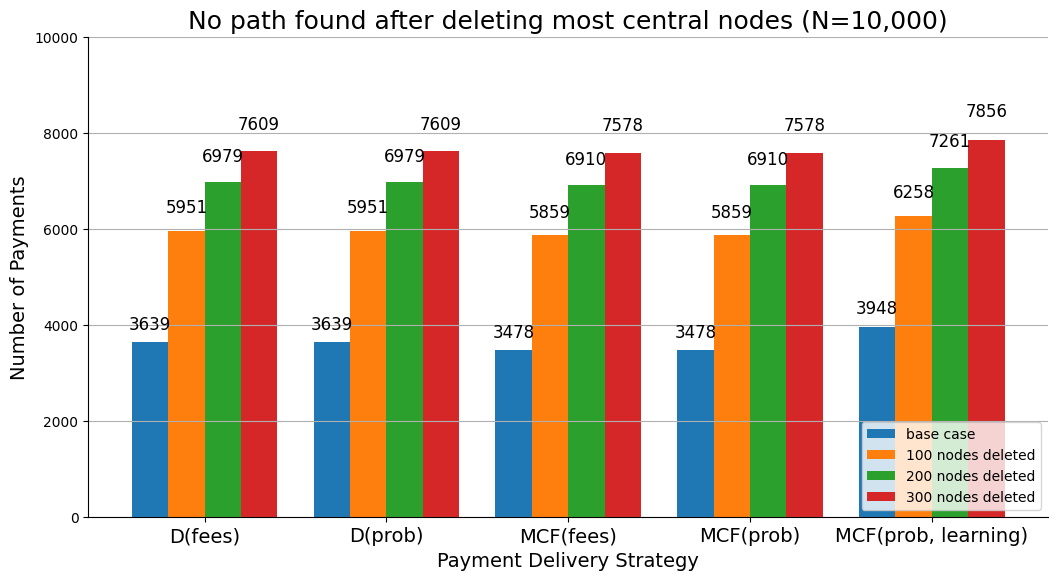

In [153]:
df = pd.read_csv('comparing_centrality.csv')
df = pd.DataFrame(df)
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
central_nodes_deleted_0 = np.array(df[(df["central_nodes_deleted"] == 0)]['no_path_found'])
central_nodes_deleted_100 = np.array(df[(df["central_nodes_deleted"] == 100)]['no_path_found'])
central_nodes_deleted_200 = np.array(df[(df["central_nodes_deleted"] == 200)]['no_path_found'])
central_nodes_deleted_300 = np.array(df[(df["central_nodes_deleted"] == 300)]['no_path_found'])

fig = plt.figure(figsize=(12, 8))
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.2
ticks = np.arange(len(labels))
rects1 = ax.bar(ticks - 1.5 * width, central_nodes_deleted_0, width, label='base case')
rects2 = ax.bar(ticks - 0.5 * width , central_nodes_deleted_100, width, align="center", label='100 nodes deleted', ecolor='black')
rects3 = ax.bar(ticks + 0.5 * width, central_nodes_deleted_200, width, label='200 nodes deleted', ecolor='black')
rects4 = ax.bar(ticks + 1.5 * width, central_nodes_deleted_300, width, label='300 nodes deleted', ecolor='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),fontsize=12,ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


ax.set_ylabel('Number of Payments',fontsize=14)

ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=14)
ax.yaxis.grid(True)

ax.legend(loc='lower right')
plt.ylim(ymax = 10000, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("No path found after deleting most central nodes (N=10,000)",fontsize=18)
plt.xlabel("Payment Delivery Strategy",fontsize=14)

plt.savefig('thesis/img/centrality_no_path_found.png', dpi=300)
plt.show()
plt.show()

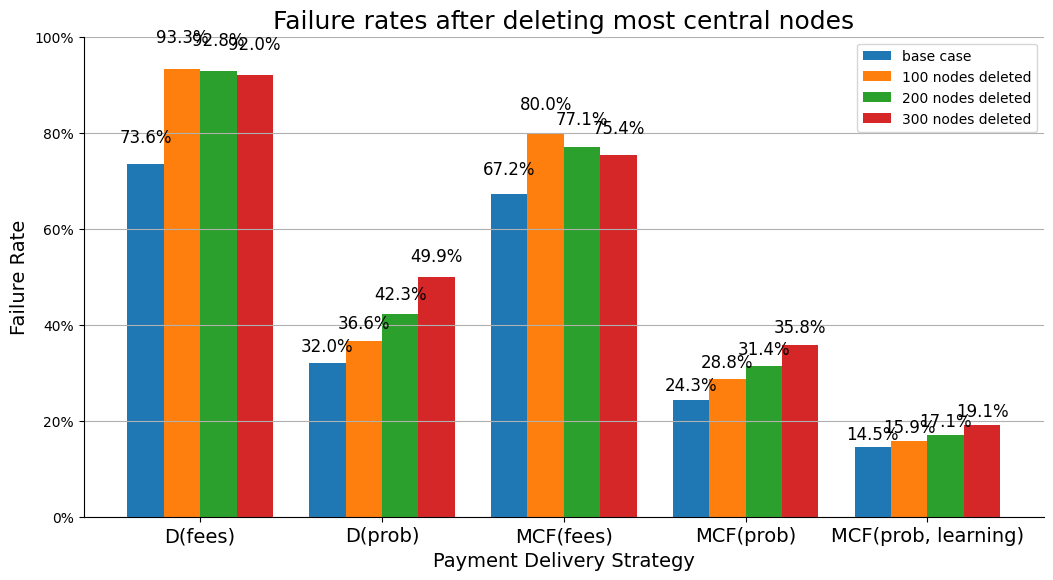

In [154]:
df = pd.read_csv('comparing_centrality.csv')
df = pd.DataFrame(df)
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
central_nodes_deleted_0 = np.array(df[(df["central_nodes_deleted"] == 0)]['failure_rate'])
central_nodes_deleted_100 = np.array(df[(df["central_nodes_deleted"] == 100)]['failure_rate'])
central_nodes_deleted_200 = np.array(df[(df["central_nodes_deleted"] == 200)]['failure_rate'])
central_nodes_deleted_300 = np.array(df[(df["central_nodes_deleted"] == 300)]['failure_rate'])

fig = plt.figure(figsize=(12, 8))
left, bottom, width, height = 0.1, 0.3, 0.8, 0.6
ax = fig.add_axes([left, bottom, width, height])

width = 0.2
ticks = np.arange(len(labels))
rects1 = ax.bar(ticks - 1.5 * width, central_nodes_deleted_0, width, label='base case')
rects2 = ax.bar(ticks - 0.5 * width , central_nodes_deleted_100, width, align="center", label='100 nodes deleted', ecolor='black')
rects3 = ax.bar(ticks + 0.5 * width, central_nodes_deleted_200, width, label='200 nodes deleted', ecolor='black')
rects4 = ax.bar(ticks + 1.5 * width, central_nodes_deleted_300, width, label='300 nodes deleted', ecolor='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        s="{0:.1f}%".format(height * 100)
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                s,fontsize=12,ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


ax.set_ylabel('Failure Rate',fontsize=14)

ax.set_xticks(ticks)
ax.set_xticklabels(labels,fontsize=14)
ax.yaxis.grid(True)

ax.legend(loc='upper right')
plt.ylim(ymax = 1, ymin = 0)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("Failure rates after deleting most central nodes",fontsize=18)
plt.xlabel("Payment Delivery Strategy",fontsize=14)

plt.savefig('thesis/img/centrality_failure_rates.png', dpi=300)
plt.show()
plt.show()

In [139]:
df.groupby("payment_delivery_method")[["central_nodes_deleted"]]

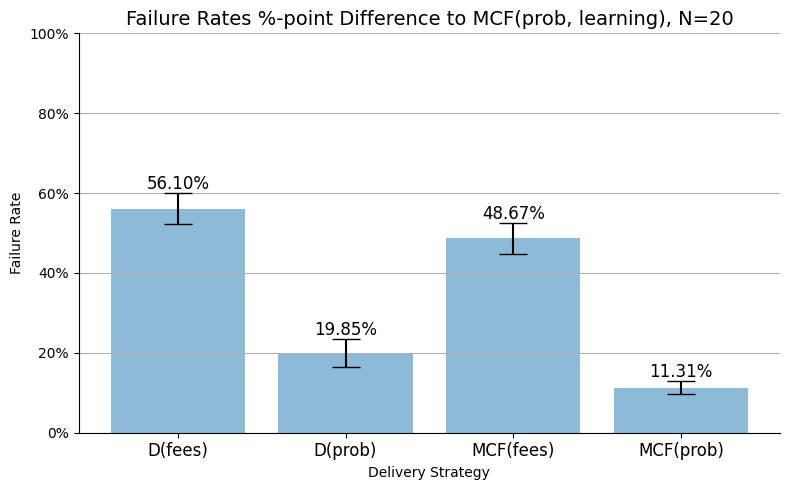

In [141]:
df = pd.read_csv("thesis/failure_rate_delta.csv")## read the Dataframe
df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + error[i] + .01,
        s="{0:.2f}%".format(height * 100),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12)
# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Failure Rates %-point Difference to MCF(prob, learning), N=20",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Delivery Strategy")
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/failure_rate_delta.png', dpi=300)
plt.show()

# Random Graphs

In [142]:
dm = ['dijkstra_fees', 'dijkstra_probabilities', 'pickhardt_pay_fees', 'pickhardt_pay_probability',
      'pickhardt_pay_probability_retained']
with open('data/random_graph_05_all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)

#df.groupby("delivery_method")['residual_amount'].sum().plot(kind='bar')
s = df.groupby("delivery_method")[['residual_amount', 'amount']].sum()
s.applymap("{0:.0f}".format)
counts = df.groupby("delivery_method").success.value_counts()
percs = df.groupby("delivery_method").success.value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

count  percentage
delivery_method                    success                            
dijkstra_fees                      delivery_failure   9779      0.9779
                                   success             221      0.0221
dijkstra_probabilities             success            9480      0.9480
                                   delivery_failure    520      0.0520
pickhardt_pay_fees                 success            6318      0.6318
                                   delivery_failure   3682      0.3682
pickhardt_pay_probability          success            9538      0.9538
                                   delivery_failure    462      0.0462
pickhardt_pay_probability_retained success            9968      0.9968
                                   delivery_failure     32      0.0032

In [143]:
with open('data/random_graph_05_all_results.ndjson') as f:
    p = ndjson.load(f)
df = pd.DataFrame(p)

#df = df.iloc[0:40000]

df = df[['delivery_method', 'success']]
data = df[(df["success"] == "success") | (df["success"] == "delivery_failure")]

payment_success_prop = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'],
                             normalize="index")
payment_success = pd.crosstab(index=data['delivery_method'],
                             columns=data['success'])
payment_success

success,delivery_failure,success
delivery_method,,
dijkstra_fees,9779,221
dijkstra_probabilities,520,9480
pickhardt_pay_fees,3682,6318
pickhardt_pay_probability,462,9538
pickhardt_pay_probability_retained,32,9968


In [144]:
df = pd.read_csv('thesis/results_random_graph.csv')
df = pd.DataFrame(df)
df["failure_rate"] = df["delivery_failure"] / (df["delivery_failure"] + df["success"])
df["delta_failure_rate"] = df["delivery_failure_diff_to_ref"] / (df["delivery_failure"] + df["success"])
#data = df.groupby("payment_delivery_method")["delivery_failure_diff_to_ref"].agg([np.mean, np.min, np.max, np.std])

# df.to_csv("thesis/results_random_graph.csv",index=False)
df

,payment_delivery_method,seed,delivery_failure,no_path_found,success,delivery_failure_diff_to_ref,failure_rate,delta_failure_rate
0,dijkstra_fees,1,9825,0,175,9797,0.982500,0.9797
1,dijkstra_probabilities,1,579,0,9421,551,0.057900,0.0551
2,pickhardt_pay_fees,1,3718,0,6282,3690,0.371800,0.3690
3,pickhardt_pay_probability,1,518,0,9482,490,0.051800,0.0490
4,pickhardt_pay_probability_retained,1,28,2,9970,0,0.002801,0.0000
5,dijkstra_fees,2,9791,0,209,9766,0.979100,0.9766
6,dijkstra_probabilities,2,577,0,9423,552,0.057700,0.0552
7,pickhardt_pay_fees,2,3532,0,6468,3507,0.353200,0.3507
8,pickhardt_pay_probability,2,519,0,9481,494,0.051900,0.0494
9,pickhardt_pay_probability_retained,2,25,0,9975,0,0.002500,0.0000


In [145]:
df["path_found"] = df["delivery_failure"] + df["success"]
df = df[["payment_delivery_method", "no_path_found", "path_found"]]
#data = df.groupby("payment_delivery_method")[['no_path_found', 'path_found']]


# cross_tab_prop = pd.crosstab(index=df['payment_delivery_method'], columns=df['no_path_found', 'path_found'],normalize="index")
crosstab = df.groupby("payment_delivery_method").mean().round(0)
crosstab

,no_path_found,path_found
payment_delivery_method,,
dijkstra_fees,0.0,10000.0
dijkstra_probabilities,0.0,10000.0
pickhardt_pay_fees,0.0,10000.0
pickhardt_pay_probability,0.0,10000.0
pickhardt_pay_probability_retained,0.0,9998.0


In [146]:
df = pd.read_csv('thesis/results_random_graph.csv')
df = pd.DataFrame(df)

df = df[['payment_delivery_method', 'failure_rate', 'delta_failure_rate']]
failure_rate = df.groupby("payment_delivery_method")["failure_rate"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
failure_rate.to_csv("thesis/random_failure_rate.csv")

delta_failure_rate = df.groupby("payment_delivery_method")["delta_failure_rate"].agg([np.count_nonzero, np.mean, np.min, np.max, np.std])
delta_failure_rate.to_csv("thesis/random_failure_rate_delta.csv")
print(delta_failure_rate.to_latex())
failure_rate

#delta_failure_rate


\begin{tabular}{lrrrrr}
\toprule
{} &  count\_nonzero &     mean &    amin &      amax &       std \\
payment\_delivery\_method            &                &          &         &           &           \\
\midrule
dijkstra\_fees                      &              5 &  0.97758 &  0.9747 &  0.980100 &  0.002275 \\
dijkstra\_probabilities             &              5 &  0.05314 &  0.0488 &  0.055399 &  0.002991 \\
pickhardt\_pay\_fees                 &              5 &  0.36008 &  0.3507 &  0.368999 &  0.007112 \\
pickhardt\_pay\_probability          &              5 &  0.04730 &  0.0430 &  0.051499 &  0.003779 \\
pickhardt\_pay\_probability\_retained &              0 &  0.00000 &  0.0000 &  0.000000 &  0.000000 \\
\bottomrule
\end{tabular}



/var/folders/4j/tn0zn0_d0vn3msztbhxktywm0000gp/T/ipykernel_96148/1922074549.py:10: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(delta_failure_rate.to_latex())


,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,5,0.97980,0.9779,0.9825,0.002052
dijkstra_probabilities,5,0.05536,0.0520,0.0579,0.002881
pickhardt_pay_fees,5,0.36230,0.3532,0.3718,0.007555
pickhardt_pay_probability,5,0.04952,0.0449,0.0528,0.003674
pickhardt_pay_probability_retained,5,0.00222,0.0013,0.0032,0.000876


In [147]:
delta_failure_rate

,count_nonzero,mean,amin,amax,std
payment_delivery_method,,,,,
dijkstra_fees,5,0.97758,0.9747,0.980100,0.002275
dijkstra_probabilities,5,0.05314,0.0488,0.055399,0.002991
pickhardt_pay_fees,5,0.36008,0.3507,0.368999,0.007112
pickhardt_pay_probability,5,0.04730,0.0430,0.051499,0.003779
pickhardt_pay_probability_retained,0,0.00000,0.0000,0.000000,0.000000


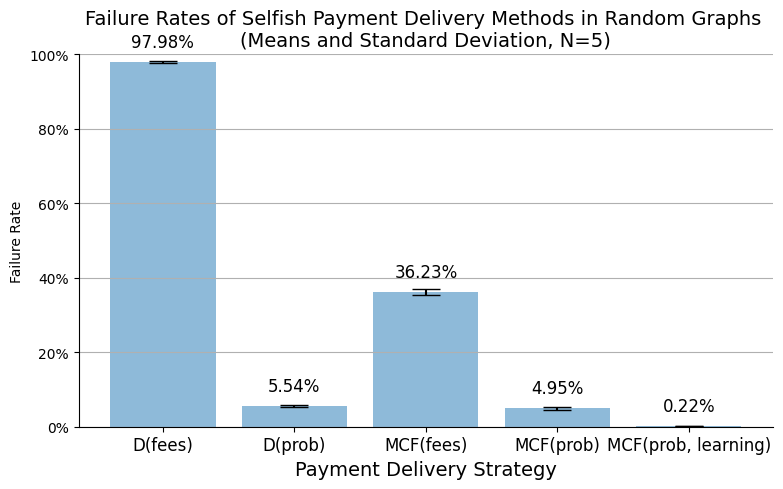

In [150]:
df = pd.read_csv("thesis/random_failure_rate.csv")## read the Dataframe
# df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)", "MCF(prob, learning)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + .04,
        s="{0:.2f}%".format(height * 100),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12)
# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Failure Rates of Selfish Payment Delivery Methods in Random Graphs \n(Means and Standard Deviation, N=5)",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Payment Delivery Strategy",fontsize=14)
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/random_graph_failure_rates_all.png', dpi=300)
plt.show()

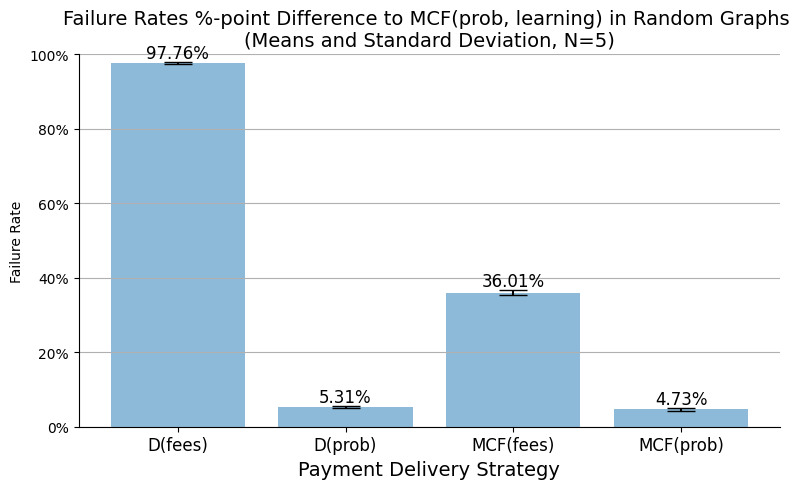

In [151]:
df = pd.read_csv("thesis/random_failure_rate_delta.csv")## read the Dataframe
df = df.drop(df.index[-1])
# Define labels, positions, bar heights and error bar heights
labels = ["D(fees)", "D(prob)", "MCF(fees)", "MCF(prob)"]
x_pos = np.arange(len(labels))
means = df['mean']
error = df['std']
width = 0.35

# Build the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(x_pos, means,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

i=0
for p in bars:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + error[i] + .01,
        s="{0:.2f}%".format(height * 100),
        fontsize=12,
        ha='center')
    i +=1

ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=12)
ax.yaxis.grid(True)

# ax.bar_label(bars, padding=3, fontsize=12)
# ax.bar_label(bars, padding=3, fontsize=12, fmt='%.2f%%')
#ax.bar_label(lab, padding=3, fontsize=12, fmt='{np.round(proportion * 100, 1)}%')

# Save the figure and show
plt.title("Failure Rates %-point Difference to MCF(prob, learning) in Random Graphs \n(Means and Standard Deviation, N=5)",fontsize=14)
# plt.legend(loc="lower left", ncol=2)
plt.xlabel("Payment Delivery Strategy",fontsize=14)
plt.ylabel("Failure Rate")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
plt.ylim(ymax = 1, ymin = 0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('thesis/img/random_graph_failure_rate_delta.png', dpi=300)
plt.show()